<h3>Objectives</h3>
<ul>
<li>Find | Explore if there is a relationship amongst variables that could be modeled with a linear function</li>
</ul>

<h3>Import Necessary Modules</h3>
<ul>
<li> Numpy: array based class that allows for transformations from the domain of linear algebra</li>
<li> Pandas: data manipulation especially with file types like json, csv, etc</li>
<li> Sklearn: linear model</li>
<li> MatplotLib: rendering plots</li>
<li> MatplotLib Finance: rendering candle stick plots </li>
<li> Seaborn: high level wrapper for matplotlib</li>
</ul>


In [9]:
# standard library
import os, sys
sys.path.append(os.path.abspath(os.path.join("../..", "src")))

# pip modules
import numpy as np
import pandas as pd
import seaborn as sns
import mplfinance as mpf
import matplotlib as mpl
import matplotlib.pyplot as plt

# ml
import pickle as p
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# local modules
import d02_processing as preprocessor
import d01_utils as stats

<h3>Import Processed Data </h3>

In [10]:
data = pd.read_csv(os.path.abspath(os.path.join("../..", "data")) + "/03_processed/01_df_trade_processed.csv")
data.head()

,trade_num,ticker,profit_loss,cap,time_duration,positions,day,week,date,volume,entry,exit,Market Cap,Short Float,Shs Float,Market Category
0,0,SBEV,1.02,304.98,161,2,4,2,2022-01-14,100,06:45:50,06:46:51,62.28M,2.22%,22.26M,micro
1,1,ATIP,-4.96,727.00,141,4,4,2,2022-01-14,50,06:41:39,06:42:42,599.70M,1.96%,193.05M,small
2,2,ATIP,-9.95,362.96,214,2,4,2,2022-01-14,100,06:37:52,06:39:42,599.70M,1.96%,193.05M,small
3,3,ATIP,-4.20,718.84,26,3,4,2,2022-01-14,100,06:37:01,06:37:25,599.70M,1.96%,193.05M,small
4,4,ATIP,-7.57,364.87,166,2,4,2,2022-01-14,100,06:32:54,06:33:52,599.70M,1.96%,193.05M,small


<h3>Multivariant Linear Regression </h3>

In [11]:
X = data[['cap','time_duration','positions','day','week','volume']] # independent variables
y = data[['profit_loss']] # dependent variable 

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [13]:
clf = linear_model.LinearRegression().fit(X_train,y_train)

In [14]:
# coefficients multiplier
arr = clf.coef_.tolist()
print('Capital: {} Time Duration: {} Positions: {} Day: {} Week: {} Volume: {}'.format(arr[0][0],arr[0][1],arr[0][2],arr[0][3],arr[0][4],arr[0][5]))

Capital: 0.004621722823430013 Time Duration: 0.027402033689590606 Positions: 0.7292938701296585 Day: 0.21332753463481263 Week: -0.013234909606886742 Volume: -0.017253632596069463


<h3> Numerical Score for accuracy of model</h3>

In [15]:
clf.score(X_test,y_test)

-0.056347260080272576

In [16]:
y_pred = clf.predict(X_test).reshape(1,341)
pl_n  = data['profit_loss'].to_numpy()
cumulative_history_p_l = np.array(stats.cumulative_sum(data['profit_loss']))
cummulative_history_predicted = np.array(stats.cumulative_sum(y_pred.tolist()[0]))
last_ = pl_n[-220:]
predicted_last_ = cummulative_history_predicted

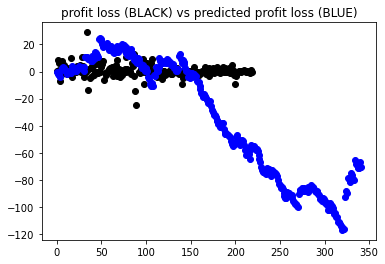

In [17]:
plt.scatter(range(0,len(last_)),last_,color='black')
plt.title('profit loss (BLACK) vs predicted profit loss (BLUE)')
plt.scatter(range(len(predicted_last_)),predicted_last_,color='blue')

<h3>Saving Model To Disk</h3>


In [18]:
# save the model to disk
filename = 'multi_variant_linear_model.sav'
p.dump(clf, open(filename, 'wb'))